# Amazon Gaming Mice Review Analysis 

## Scraping reviews

### Libraries

In [1]:
import re
import csv
import time
import json
import random
import requests
import pandas as pd
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm

### Scraping gaming mouse products

In [2]:
headers = {
    "accept-language": "en-GB,en;q=0.9",
    "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15",
}

In [3]:
def get_page(url):
    try:
        response = requests.get(url, headers=headers)
        if "captcha" in response.text.lower():
            print(
                "CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service."
            )
            return None
        return BeautifulSoup(response.text, "lxml")
    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}")
        return None


def parse_product_list(page):
    products = []
    for product in page.select(".s-main-slot .s-result-item"):
        title = product.select_one("h2 .a-link-normal")
        if title:
            link = title["href"]
            link = re.sub(r'^.*?https:\/\/www\.amazon\.com\/', 'https://www.amazon.com/', link)
            products.append(
                {
                    "title": title.get_text(strip=True),
                    "link": f"https://www.amazon.com{link}",
                }
            )
    return products


def paginate_products(base_url, max_pages=100):
    products = []

    for page_number in range(1, max_pages + 1):
        paginated_url = f"{base_url}&page={page_number}"
        print(f"Fetching page {page_number}: {paginated_url}")
        page = get_page(paginated_url)
        if not page:
            break

        products.extend(parse_product_list(page))

        time.sleep(random.uniform(2, 5))  # Random sleep to mimic human behavior

    return products

In [17]:
base_url = "https://www.amazon.com/s?k=gaming mouse"
products = paginate_products(base_url, 20)

Fetching page 1: https://www.amazon.com/s?k=gaming mouse&page=1
Fetching page 2: https://www.amazon.com/s?k=gaming mouse&page=2
Fetching page 3: https://www.amazon.com/s?k=gaming mouse&page=3
Fetching page 4: https://www.amazon.com/s?k=gaming mouse&page=4
Fetching page 5: https://www.amazon.com/s?k=gaming mouse&page=5
Fetching page 6: https://www.amazon.com/s?k=gaming mouse&page=6
Fetching page 7: https://www.amazon.com/s?k=gaming mouse&page=7
Fetching page 8: https://www.amazon.com/s?k=gaming mouse&page=8
Fetching page 9: https://www.amazon.com/s?k=gaming mouse&page=9
Fetching page 10: https://www.amazon.com/s?k=gaming mouse&page=10
Fetching page 11: https://www.amazon.com/s?k=gaming mouse&page=11
Fetching page 12: https://www.amazon.com/s?k=gaming mouse&page=12
Fetching page 13: https://www.amazon.com/s?k=gaming mouse&page=13
Fetching page 14: https://www.amazon.com/s?k=gaming mouse&page=14
Fetching page 15: https://www.amazon.com/s?k=gaming mouse&page=15
Fetching page 16: https://ww

In [5]:
def filter_products(products):
    seen_links = set()
    filtered_products = []

    for product in products:
        link = re.sub(r'^.*?https:\/\/www\.amazon\.com\/', 'https://www.amazon.com/', product['link'])

        if 'pad' not in product['title'].lower() and link not in seen_links:
            filtered_products.append({
                'title': product['title'],
                'link': link
            })
            seen_links.add(link)

    return filtered_products
    

products_filtered = filter_products(products)

In [7]:
with open("products.json", "w") as f:
    json.dump(products_filtered, f, indent=4, ensure_ascii=True)

### Scraping reviews

In [13]:
def parse_reviews(product_url):
    reviews = []
    page = get_page(product_url)
    if not page:
        return reviews
    for review in page.select(".review"):
        rating_title = review.select_one(".review-title").get_text(strip=True) # type: ignore
        rating = review.select_one(".review-rating").get_text(strip=True) # type: ignore
        title = rating_title.split("stars")[-1]
        text = review.select_one(".review-text").get_text(strip=True) # type: ignore
        text = re.sub(r'Read More"*$', '', text)
        reviews.append(
            {
                "title": title,
                "rating": rating,
                "text": text,
            }
        )
    return reviews


def parse_product_reviews(products, file_name="data/reviews.csv"):
    with open(file_name, mode="a", newline="", encoding="utf-8") as file:
        writer = csv.writer(file)
        writer.writerow(["product_title", "product_link", "title", "rating", "text"])

        for product in tqdm(products):
            product_reviews = parse_reviews(product["link"])
            for review in tqdm(product_reviews):
                writer.writerow(
                    [
                        product["title"],
                        product["link"],
                        review["title"],
                        review["rating"],
                        review["text"],
                    ]
                )
            time.sleep(random.uniform(2, 5))  # Random sleep to mimic human behavior

In [8]:
with open("products.json", "r") as f:
    products = json.load(f)

In [26]:
parse_product_reviews(products)

  0%|          | 0/419 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Request failed: HTTPSConnectionPool(host='www.amazon.comhttps', port=443): Max retries exceeded with url: /aax-us-iad.amazon.com/x/c/JDJE5mHmZOQT-A7KIv3GPD4AAAGRgY0fuAEAAAH2AQBvbm9fdHhuX2JpZDMgICBvbm9fdHhuX2ltcDEgICB79onT/https://www.amazon.com/Logitech-Superlight-Lightspeed-Lightweight-Programmable/dp/B09NBWL8J5/ref=sxin_25_sbv_search_btf?content-id=amzn1.sym.5cde1a09-4942-4242-87c5-e66d2d3b6a3c%3Aamzn1.sym.5cde1a09-4942-4242-87c5-e66d2d3b6a3c&cv_ct_cx=gaming+mouse&dib=eyJ2IjoiMSJ9.Tk7SCN-M2rCIicnW98Z5Lw.JBtBpVBXo4czZH1ntDW9DqI4WIiygC7UcBVFgTjVTeo&dib_tag=se&keywords=gaming+mouse&pd_rd_i=B09NBWL8J5&pd_rd_r=56580e53-39df-41db-a06a-db7d410edcf1&pd_rd_w=qIgy2&pd_rd_wg=ehuY3&pf_rd_p=5cde1a09-4942-4242-87c5-e66d2d3b6a3c&pf_rd_r=NZMK9XT69Z8VSR6XKC0C&qid=1724455395&sbo=RZvfv%2F%2FHxDF%2BO5021pAnSA%3D%3D&sr=1-1-5190daf0-67e3-427c-bea6-c72c1df98776 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000020909FD4740>: Failed to resolve 'www.amazon.comhttps' ([Errno 

0it [00:00, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Request failed: HTTPSConnectionPool(host='www.amazon.comhttps', port=443): Max retries exceeded with url: /aax-us-iad.amazon.com/x/c/JJxHaWwVUFnk0nydhNgzlC8AAAGRgY1KVgEAAAH2AQBvbm9fdHhuX2JpZDYgICBvbm9fdHhuX2ltcDEgICAxGT-7/https://www.amazon.com/Logitech-G-Artanis-WL-Black/dp/B092CB69Q4/ref=sxbs_sbv_search_btf?content-id=amzn1.sym.805ca70d-e057-4820-b9b3-729eee71f8a9%3Aamzn1.sym.805ca70d-e057-4820-b9b3-729eee71f8a9&cv_ct_cx=gaming+mouse&dib=eyJ2IjoiMSJ9.yuzqdy56fc0lAIanyPLCWA.iuGrs8b8XYGrwgLMaCfWkyVVGKSH-aqWvXlw-Ejzxu4&dib_tag=se&keywords=gaming+mouse&pd_rd_i=B092CB69Q4&pd_rd_r=3d264e32-042e-4409-991b-5508341d3445&pd_rd_w=n7Uhe&pd_rd_wg=Rorms&pf_rd_p=805ca70d-e057-4820-b9b3-729eee71f8a9&pf_rd_r=23BKSMQACVV7ES84PVZQ&qid=1724455405&sbo=RZvfv%2F%2FHxDF%2BO5021pAnSA%3D%3D&sr=1-33-48f7baba-8e26-45f3-8811-e1a601ad20bf (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000020908DF7E30>: Failed to resolve 'www.amazon.comhttps' ([Errno 11001] getaddrinfo failed)"))


0it [00:00, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Request failed: HTTPSConnectionPool(host='www.amazon.comhttps', port=443): Max retries exceeded with url: /aax-us-iad.amazon.com/x/c/JNpyRiTOYCSMAPSF_mBMmuMAAAGRgY1aJAEAAAH2AQBvbm9fdHhuX2JpZDMgICBvbm9fdHhuX2ltcDEgICDHwy3c/https://www.amazon.com/Logitech-G-Artanis-WL-Black/dp/B092CB69Q4/ref=sxbs_sbv_search_btf?content-id=amzn1.sym.805ca70d-e057-4820-b9b3-729eee71f8a9%3Aamzn1.sym.805ca70d-e057-4820-b9b3-729eee71f8a9&cv_ct_cx=gaming+mouse&dib=eyJ2IjoiMSJ9.yuzqdy56fc0lAIanyPLCWA.NwQ4SSyQHhel8mGf1C2fZBYf50RogDGBlc3PuF2BS3I&dib_tag=se&keywords=gaming+mouse&pd_rd_i=B092CB69Q4&pd_rd_r=704b2cd1-6304-43e7-a950-f08a3f7ff7e3&pd_rd_w=D6pKw&pd_rd_wg=4L7hA&pf_rd_p=805ca70d-e057-4820-b9b3-729eee71f8a9&pf_rd_r=547G1DGHC4RKVM1CGY2T&qid=1724455410&sbo=RZvfv%2F%2FHxDF%2BO5021pAnSA%3D%3D&sr=1-49-48f7baba-8e26-45f3-8811-e1a601ad20bf (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000020907AF9640>: Failed to resolve 'www.amazon.comhttps' ([Errno 11001] getaddrinfo failed)"))


0it [00:00, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Request failed: HTTPSConnectionPool(host='www.amazon.comhttps', port=443): Max retries exceeded with url: /aax-us-iad.amazon.com/x/c/JEEhP6kwwpBnA2QYb89EIfUAAAGRgY1uKgEAAAH2AQBvbm9fdHhuX2JpZDMgICBvbm9fdHhuX2ltcDEgICDS-oee/https://www.amazon.com/Logitech-G-Artanis-WL-Black/dp/B092CB69Q4/ref=sxbs_sbv_search_btf?content-id=amzn1.sym.805ca70d-e057-4820-b9b3-729eee71f8a9%3Aamzn1.sym.805ca70d-e057-4820-b9b3-729eee71f8a9&cv_ct_cx=gaming+mouse&dib=eyJ2IjoiMSJ9.yuzqdy56fc0lAIanyPLCWA.-hnSBJeS3bQzwIdfc1v8MIoAz-zMp-Vo6AKtqTntyVQ&dib_tag=se&keywords=gaming+mouse&pd_rd_i=B092CB69Q4&pd_rd_r=b6f3d981-4fac-4e1e-8542-fc9a77e8be13&pd_rd_w=XXntx&pd_rd_wg=1BZ0T&pf_rd_p=805ca70d-e057-4820-b9b3-729eee71f8a9&pf_rd_r=ZR1ZZ4SQKHQ7A89FHXKF&qid=1724455415&sbo=RZvfv%2F%2FHxDF%2BO5021pAnSA%3D%3D&sr=1-65-48f7baba-8e26-45f3-8811-e1a601ad20bf (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000020909FE2E40>: Failed to resolve 'www.amazon.comhttps' ([Errno 11001] getaddrinfo failed)"))


0it [00:00, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Request failed: HTTPSConnectionPool(host='www.amazon.comhttps', port=443): Max retries exceeded with url: /aax-us-iad.amazon.com/x/c/JHRSw3GClRlXafb5yKt91F4AAAGRgY2F6AEAAAH2AQBvbm9fdHhuX2JpZDIgICBvbm9fdHhuX2ltcDEgICCeTkbB/https://www.amazon.com/Logitech-G-Artanis-WL-Black/dp/B092CB69Q4/ref=sxbs_sbv_search_btf?content-id=amzn1.sym.805ca70d-e057-4820-b9b3-729eee71f8a9%3Aamzn1.sym.805ca70d-e057-4820-b9b3-729eee71f8a9&cv_ct_cx=gaming+mouse&dib=eyJ2IjoiMSJ9.yuzqdy56fc0lAIanyPLCWA.UcIndxHbILoDxt6RgyA-hcUvsnnD1CRIT68t9y37Xw8&dib_tag=se&keywords=gaming+mouse&pd_rd_i=B092CB69Q4&pd_rd_r=4f21c6d1-5640-4f6c-8334-812bf8daafb1&pd_rd_w=uZ4tr&pd_rd_wg=0tqyC&pf_rd_p=805ca70d-e057-4820-b9b3-729eee71f8a9&pf_rd_r=Q4TZQ36MFXSVZ17PMYSC&qid=1724455421&sbo=RZvfv%2F%2FHxDF%2BO5021pAnSA%3D%3D&sr=1-81-48f7baba-8e26-45f3-8811-e1a601ad20bf (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000002090A762E10>: Failed to resolve 'www.amazon.comhttps' ([Errno 11001] getaddrinfo failed)"))


0it [00:00, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Request failed: HTTPSConnectionPool(host='www.amazon.comhttps', port=443): Max retries exceeded with url: /aax-us-iad.amazon.com/x/c/JPdqwTV6RcOF3EhyrxfZtmQAAAGRgY2s7QEAAAH2AQBvbm9fdHhuX2JpZDUgICBvbm9fdHhuX2ltcDEgICDFbeSr/https://www.amazon.com/Logitech-G-Artanis-WL-Black/dp/B092CB69Q4/ref=sxbs_sbv_search_btf?content-id=amzn1.sym.805ca70d-e057-4820-b9b3-729eee71f8a9%3Aamzn1.sym.805ca70d-e057-4820-b9b3-729eee71f8a9&cv_ct_cx=gaming+mouse&dib=eyJ2IjoiMSJ9.yuzqdy56fc0lAIanyPLCWA.V884XtOENg1p3wX38TzQLX5TrEUv9aHVSBTDfb_9ZHg&dib_tag=se&keywords=gaming+mouse&pd_rd_i=B092CB69Q4&pd_rd_r=46710c34-1576-443b-9b77-675264be3b07&pd_rd_w=wLipP&pd_rd_wg=TsAkn&pf_rd_p=805ca70d-e057-4820-b9b3-729eee71f8a9&pf_rd_r=RCTFSP0TFDRZC9HDB5N1&qid=1724455431&sbo=RZvfv%2F%2FHxDF%2BO5021pAnSA%3D%3D&sr=1-113-48f7baba-8e26-45f3-8811-e1a601ad20bf (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000020909A7D550>: Failed to resolve 'www.amazon.comhttps' ([Errno 11001] getaddrinfo failed)"))

0it [00:00, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Request failed: HTTPSConnectionPool(host='www.amazon.comhttps', port=443): Max retries exceeded with url: /aax-us-iad.amazon.com/x/c/JGv__qZeN0W1xgNsXdbV9PEAAAGRgY3bYAEAAAH2AQBvbm9fdHhuX2JpZDIgICBvbm9fdHhuX2ltcDEgICDPN4k5/https://www.amazon.com/Logitech-G-Artanis-WL-Black/dp/B092CB69Q4/ref=sxbs_sbv_search_btf?content-id=amzn1.sym.805ca70d-e057-4820-b9b3-729eee71f8a9%3Aamzn1.sym.805ca70d-e057-4820-b9b3-729eee71f8a9&cv_ct_cx=gaming+mouse&dib=eyJ2IjoiMSJ9.yuzqdy56fc0lAIanyPLCWA.Sz854iSgOprzhonRui4CC7H6bXGLNKgu5hTVUNRbavI&dib_tag=se&keywords=gaming+mouse&pd_rd_i=B092CB69Q4&pd_rd_r=66facfd4-c497-4cda-9725-f57d32230460&pd_rd_w=tFKFJ&pd_rd_wg=kfMuQ&pf_rd_p=805ca70d-e057-4820-b9b3-729eee71f8a9&pf_rd_r=ZV47H0PW2V8S7PVDVPKC&qid=1724455443&sbo=RZvfv%2F%2FHxDF%2BO5021pAnSA%3D%3D&sr=1-145-48f7baba-8e26-45f3-8811-e1a601ad20bf (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000020909F1B9B0>: Failed to resolve 'www.amazon.comhttps' ([Errno 11001] getaddrinfo failed)"))

0it [00:00, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Request failed: HTTPSConnectionPool(host='www.amazon.comhttps', port=443): Max retries exceeded with url: /aax-us-iad.amazon.com/x/c/JF4DH8MZVTsTIWDYBymw5wMAAAGRgY6ZsQEAAAH2AQBvbm9fdHhuX2JpZDEgICBvbm9fdHhuX2ltcDEgICAJQnPr/https://www.amazon.com/Logitech-G-Artanis-WL-Black/dp/B092CB69Q4/ref=sxbs_sbv_search_btf?content-id=amzn1.sym.805ca70d-e057-4820-b9b3-729eee71f8a9%3Aamzn1.sym.805ca70d-e057-4820-b9b3-729eee71f8a9&cv_ct_cx=gaming+mouse&dib=eyJ2IjoiMSJ9.yuzqdy56fc0lAIanyPLCWA.r-ohw2D0sUC7suaj_cCFrgerClLTmmzjwE-mK-QJ80g&dib_tag=se&keywords=gaming+mouse&pd_rd_i=B092CB69Q4&pd_rd_r=72b7e480-eed4-41bb-8c1e-cbeb1bc8686c&pd_rd_w=akYMY&pd_rd_wg=TsJq1&pf_rd_p=805ca70d-e057-4820-b9b3-729eee71f8a9&pf_rd_r=40PW6A7R8FFCTJAMYD8Y&qid=1724455491&sbo=RZvfv%2F%2FHxDF%2BO5021pAnSA%3D%3D&sr=1-305-48f7baba-8e26-45f3-8811-e1a601ad20bf (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000002090A5D8DA0>: Failed to resolve 'www.amazon.comhttps' ([Errno 11001] getaddrinfo failed)"))

0it [00:00, ?it/s]

#### Repeat for the products that got an error

In [45]:
reviews_df = pd.read_csv("data/reviews.csv", header=0)

reviewed_product_links = reviews_df["product_link"].unique()
products_to_repeat = [
    product for product in products if product["link"] not in reviewed_product_links
]

In [46]:
len(products_to_repeat)

42

In [21]:
products_to_repeat[0]["link"]

'https://www.amazon.com/Logitech-Performance-Programmable-Adjustable-LIGHTSYNC/dp/B0D7NR55PF/ref=sr_1_129?dib=eyJ2IjoiMSJ9.lya5ASqFxY2WgsUV2-dPcoYwbGvmEtJ1VZzzQCpnXSE1JPteyJ9PXYlO3BVMkzXl_x_Q2Fv5nKCp5yu2HgdL68Mgw45PJwULkTxlKGlvp9gDwu3gtg80q4bg_RGfcB0xC9ODKNXAn6iABC2_A_xErZZTRky6MnmDpsBvD3BkxBlGkQbYZwtZJPIrW_oJHkcFTujLk-g7jorTEa0iXH_owjIpLmT67CWzFrC-vpXxSgs.07jcbTP7PbwdsORCmjo-Zd5-FCYXBZ6eMq8uDFdVl1o&dib_tag=se&keywords=gaming+mouse&qid=1724455431&sr=8-129'

In [44]:
parse_product_reviews(products_to_repeat)

  0%|          | 0/44 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

CAPTCHA detected. Please solve the CAPTCHA manually or use an anti-CAPTCHA service.


0it [00:00, ?it/s]

AttributeError: 'NoneType' object has no attribute 'get_text'

In [47]:
reviews_df = pd.read_csv("data/reviews.csv", header=0)
reviews_df = reviews_df.drop_duplicates()
reviews_df.to_csv("data/reviews.csv", sep=",", index=False)

In [48]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498 entries, 0 to 3497
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_title  3498 non-null   object
 1   product_link   3498 non-null   object
 2   title          3497 non-null   object
 3   rating         3498 non-null   object
 4   text           3498 non-null   object
dtypes: object(5)
memory usage: 136.8+ KB


## Sentiment analysis

### Libraries

In [1]:
import traceback
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from deep_translator import GoogleTranslator

import nltk
from nltk.tokenize import sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

from scipy import stats

### Load and modify reviews

In [5]:
reviews_df = pd.read_csv("data/reviews.csv", header=0)

In [6]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498 entries, 0 to 3497
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_title  3498 non-null   object
 1   product_link   3498 non-null   object
 2   title          3497 non-null   object
 3   rating         3498 non-null   object
 4   text           3494 non-null   object
dtypes: object(5)
memory usage: 136.8+ KB


#### Fix empty text and title

In [16]:
def float2string(t):
    try:
        float(t)
        return ''
    except ValueError:
        return t
    
reviews_df['title'] = reviews_df['title'].apply(float2string)
reviews_df['text'] = reviews_df['text'].apply(float2string)

#### Set numeric rating

In [7]:
reviews_df['rating'] = reviews_df['rating'].str.extract(r'(\d+\.\d+)').astype(float)

#### Translate title and review to English

In [14]:
en = 'EN-US'
google_translate = GoogleTranslator(source='auto', target='en')

In [24]:
nltk.download('punkt')  # sentence tokenizer

def chunk_generator(text, max_length=4900):
    sentences = sent_tokenize(text)
    current_chunk = ""
    
    for sentence in sentences:
        if len(current_chunk) + len(sentence) + 1 <= max_length:
            if current_chunk:
                current_chunk += " " + sentence
            else:
                current_chunk = sentence
        else:
            yield current_chunk
            current_chunk = sentence
    
    if current_chunk:
        yield current_chunk


def translate2en(text):
    if text == '':
        return ''
    
    try:
        translated_text = ''
        
        # Use the chunk generator
        for chunk in chunk_generator(text):
            translated_chunk = google_translate.translate(chunk)
            # Check if translated_chunk is None before concatenating
            if translated_chunk is not None:
                translated_text += translated_chunk + " "
            else:
                translated_text += chunk + " "
                print(f'Warning: Translation returned None for chunk: {chunk}')
        
        return translated_text.strip()
    except Exception as e:
        print(f'Error occured while processing the following text: {text}')
        print(traceback.print_exception(e))
        return ''

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\askador\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
reviews_df['title_en'] = reviews_df['title'].apply(translate2en)

In [26]:
reviews_df['text_en'] = reviews_df['text'].apply(translate2en)

In [17]:
reviews_df['title_en'] = reviews_df['title_en'].apply(float2string)
reviews_df['text_en'] = reviews_df['text_en'].apply(float2string)

In [27]:
reviews_df.to_csv("data/reviews_translated.csv", sep=",", index=False)

### Sentiment Analysis with VADER

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is sensitive to both the polarity (positive/negative) and the intensity (strength) of emotions. It's widely used for its effectiveness in analyzing the sentiment of short texts like tweets.

In [ ]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

In [18]:
reviews_df['title_sentiment'] = reviews_df['title_en'].apply(lambda x: sia.polarity_scores(x)['compound'])
reviews_df['text_sentiment'] = reviews_df['text_en'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize ratings
reviews_df['rating_category'] = pd.cut(reviews_df['rating'], bins=[0, 2.5, 3.5, 5], labels=['Negative', 'Neutral', 'Positive'])

# Calculate the difference between title and text sentiment
reviews_df['sentiment_difference'] = reviews_df['title_sentiment'] - reviews_df['text_sentiment']

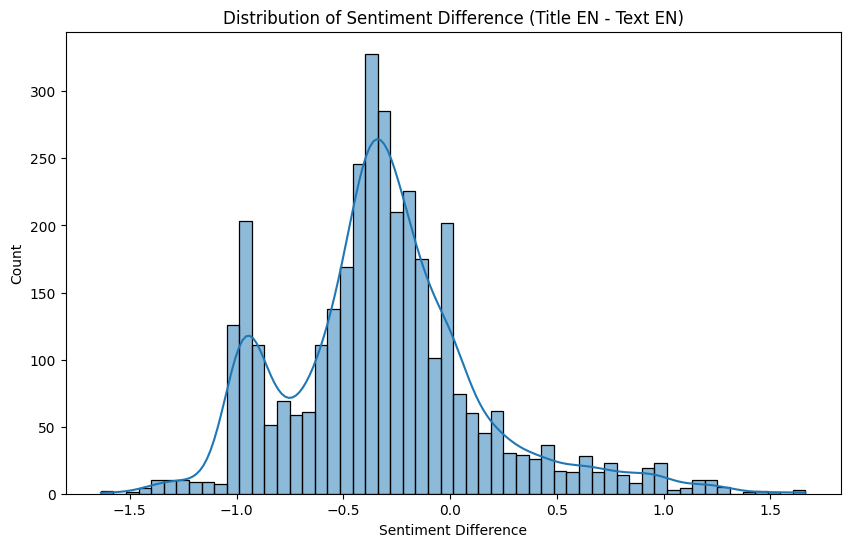

In [19]:
# Visualize the distribution of sentiment difference
plt.figure(figsize=(10, 6))
sns.histplot(reviews_df['sentiment_difference'], kde=True)
plt.title('Distribution of Sentiment Difference (Title EN - Text EN)')
plt.xlabel('Sentiment Difference')
plt.ylabel('Count')
plt.show()

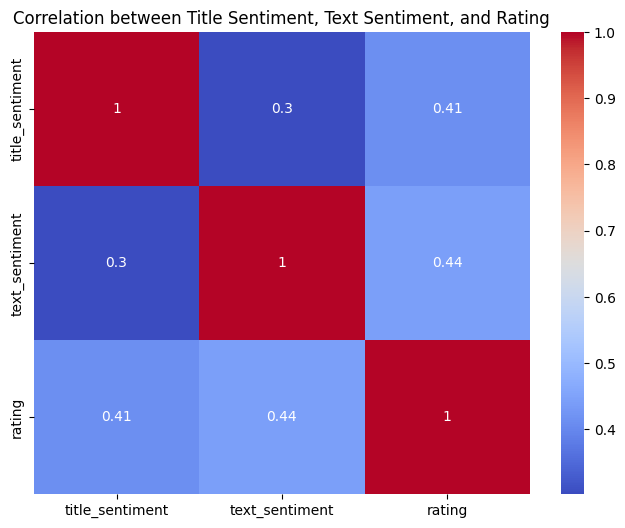

In [20]:
# Calculate correlation between title sentiment, text sentiment, and rating
correlation_matrix = reviews_df[['title_sentiment', 'text_sentiment', 'rating']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Title Sentiment, Text Sentiment, and Rating')
plt.show()

**Correlation Matrix:**
  - **Title Sentiment and Rating (0.41):** There's a moderate positive correlation between title sentiment and rating. This suggests that titles reflecting positive sentiment tend to be associated with higher ratings.
  - **Text Sentiment and Rating (0.44):** The correlation between text sentiment and rating is slightly stronger than that of the title sentiment. Reviews with positive content generally receive higher ratings.
  - **Title Sentiment and Text Sentiment (0.3):** The moderate correlation between title and text sentiment indicates that the sentiment expressed in the title is somewhat aligned with the overall sentiment of the review text, though not perfectly so.
  
Both title and text sentiments positively influence the rating, with text sentiment having a slightly stronger impact. However, the moderate correlation between title and text sentiment suggests that they capture different aspects of the reviewer's sentiment, making it important to consider both for sentiment analysis.

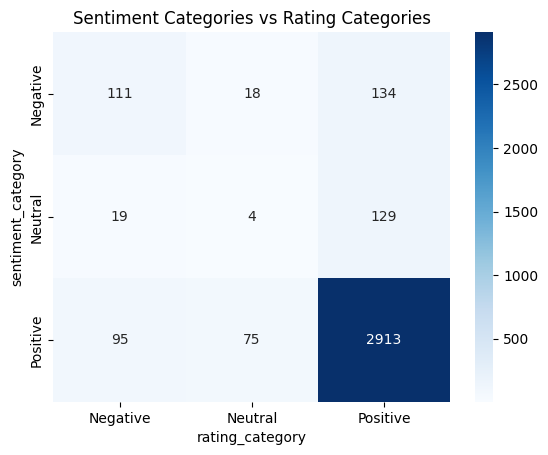

In [21]:
# Compare sentiment categories with rating categories
reviews_df['sentiment_category'] = pd.cut(reviews_df['text_sentiment'], bins=[-1, -0.05, 0.05, 1], labels=['Negative', 'Neutral', 'Positive'])

confusion = pd.crosstab(reviews_df['sentiment_category'], reviews_df['rating_category'])
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Sentiment Categories vs Rating Categories')
plt.show()

**Confusion Matrix of Sentiment vs. Rating Categories:**
   - **High Positive Sentiment, High Positive Rating (2913 cases):** Most positive sentiment reviews align with high ratings, reinforcing the idea that positive sentiment correlates strongly with positive ratings.
   - **Negative Sentiment with Positive Ratings (134 cases) and Positive Sentiment with Negative Ratings (95 cases):** There are cases where the sentiment does not align with the rating, which could indicate complexities in reviewer behavior or external factors affecting the rating. This misalignment might indicate cases where users express dissatisfaction in the text but still provide a positive rating, which could be due to reasons unrelated to sentiment, such as product features or brand loyalty.
   - Neutral Sentiment and Ratings: Neutral sentiment and ratings seem to have the least overlap (with only 4 cases aligning), suggesting that neutral language in reviews might not strongly correlate with the middle-ground ratings of 3 stars.

While positive sentiment generally leads to higher ratings, there are instances where sentiment and ratings do not align, potentially due to factors like product expectations, external influences, or nuanced reviewer opinions.

In [22]:
# Analyze reviews where title and text sentiments differ significantly
sentiment_threshold = 0.5
reviews_df['sentiment_mismatch'] = reviews_df['sentiment_difference'].abs() > sentiment_threshold

print("Percentage of reviews with significant sentiment mismatch:")
print(reviews_df['sentiment_mismatch'].mean() * 100)

Percentage of reviews with significant sentiment mismatch:
34.76272155517439


A notable proportion of reviews show inconsistency between the sentiment of the title and the text. This could imply varying degrees of emphasis or focus between the title and the body of the review, or perhaps different interpretations of sentiment when writing a concise title versus a detailed review.

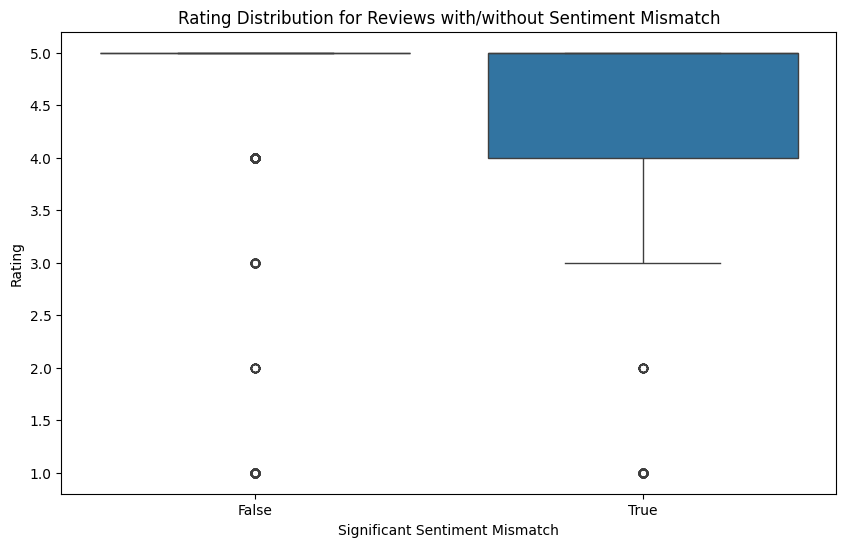

In [23]:
# Analyze rating distribution for mismatched sentiments
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment_mismatch', y='rating', data=reviews_df)
plt.title('Rating Distribution for Reviews with/without Sentiment Mismatch')
plt.xlabel('Significant Sentiment Mismatch')
plt.ylabel('Rating')
plt.show()

In [24]:
# T-test to compare ratings of matched vs mismatched sentiment reviews
matched_ratings = reviews_df[~reviews_df['sentiment_mismatch']]['rating']
mismatched_ratings = reviews_df[reviews_df['sentiment_mismatch']]['rating']
t_stat, p_value = stats.ttest_ind(matched_ratings, mismatched_ratings)

print(f"T-test results: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

T-test results: t-statistic = 5.7365, p-value = 0.0000


**T-Test for Sentiment Mismatch and Ratings:**
   - **T-Statistic (5.7365) and P-Value (0.0000):** The T-test results reveal a statistically significant difference between the ratings of reviews with matched and mismatched sentiments.


In [42]:
# Analyze examples of mismatched sentiments
mismatched_examples = reviews_df[reviews_df['sentiment_mismatch']].sort_values('sentiment_difference', key=abs, ascending=False)
print("Examples of reviews with mismatched sentiments:\n")
for _, row in mismatched_examples.head().iterrows():
    print(f"Rating: {row['rating']}")
    print(f"Title: {row['title_en']}")
    print(f"Title Sentiment: {row['title_sentiment']:.2f}")
    print(f"Text: {row['text_en'][:100]}...")
    print(f"Text Sentiment: {row['text_sentiment']:.2f}")
    print("-" * 80)

Examples of reviews with mismatched sentiments:

Rating: 2.0
Title: great specs, not great shape
Title Sentiment: 0.85
Text: This mouse is equipped with good technologies. The sensor is great and fast, clicks are responsive, ...
Text Sentiment: -0.82
--------------------------------------------------------------------------------
Rating: 2.0
Title: great specs, not great shape
Title Sentiment: 0.85
Text: This mouse is equipped with good technologies. The sensor is great and fast, clicks are responsive, ...
Text Sentiment: -0.82
--------------------------------------------------------------------------------
Rating: 5.0
Title: I'm not a gamer, but I love this mouse
Title Sentiment: -0.68
Text: Great mouse. I am not a gamer, but I was looking for a comfortable, effective mouse that was simple ...
Text Sentiment: 0.96
--------------------------------------------------------------------------------
Rating: 5.0
Title: Easy and nice looking
Title Sentiment: 0.69
Text: I had bought the purple

#### Check how title and text sentiment impacts overall rating

In [40]:
def categorize_sentiment(title_sentiment, text_sentiment):
    if title_sentiment > 0 and text_sentiment < 0:
        return 'Pos-Neg'
    elif title_sentiment < 0 and text_sentiment > 0:
        return 'Neg-Pos'
    elif title_sentiment > 0 and text_sentiment > 0:
        return 'Pos-Pos'
    elif title_sentiment < 0 and text_sentiment < 0:
        return 'Neg-Neg'
    elif title_sentiment == 0:
        return 'Neutral-Any'
    elif text_sentiment == 0:
        return 'Any-Neutral'
    else:
        return 'Other'

reviews_df['sentiment_category'] = reviews_df.apply(lambda row: categorize_sentiment(row['title_sentiment'], row['text_sentiment']), axis=1)

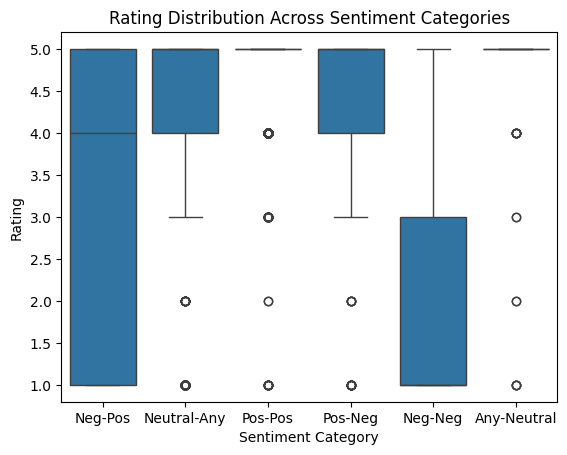

In [41]:
sns.boxplot(x='sentiment_category', y='rating', data=reviews_df)
plt.title('Rating Distribution Across Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Rating')
plt.show()

In [44]:
categories = ['Pos-Neg', 'Neg-Pos', 'Pos-Pos', 'Neg-Neg', 'Neutral-Any', 'Any-Neutral']

In [49]:
anova_list = [
    reviews_df[reviews_df['sentiment_category'] == c]['rating'] 
    for c in categories
]
f_stat, p_value = stats.f_oneway(*anova_list)

print(f"ANOVA test results: F-statistic = {f_stat:.4f}, p-value = {p_value:.4f}")


ANOVA test results: F-statistic = 192.5307, p-value = 0.0000


The ANOVA test indicates that there is a statistically significant difference in ratings across different sentiment categories.

In [51]:
from itertools import combinations

# List to store the results
results = []

for cat1, cat2 in combinations(categories, 2):
    t_stat, p_value = stats.ttest_ind(
        reviews_df[reviews_df['sentiment_category'] == cat1]['rating'],
        reviews_df[reviews_df['sentiment_category'] == cat2]['rating']
    )
    results.append((cat1, cat2, t_stat, p_value))

# Display the results
for cat1, cat2, t_stat, p_value in results:
    print(f"T-test between {cat1} and {cat2}: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

T-test between Pos-Neg and Neg-Pos: t-statistic = 3.2859, p-value = 0.0012
T-test between Pos-Neg and Pos-Pos: t-statistic = -13.7781, p-value = 0.0000
T-test between Pos-Neg and Neg-Neg: t-statistic = 7.5940, p-value = 0.0000
T-test between Pos-Neg and Neutral-Any: t-statistic = -2.2680, p-value = 0.0235
T-test between Pos-Neg and Any-Neutral: t-statistic = -2.5999, p-value = 0.0101
T-test between Neg-Pos and Pos-Pos: t-statistic = -25.8453, p-value = 0.0000
T-test between Neg-Pos and Neg-Neg: t-statistic = 4.4636, p-value = 0.0000
T-test between Neg-Pos and Neutral-Any: t-statistic = -7.6293, p-value = 0.0000
T-test between Neg-Pos and Any-Neutral: t-statistic = -5.6420, p-value = 0.0000
T-test between Pos-Pos and Neg-Neg: t-statistic = 37.0744, p-value = 0.0000
T-test between Pos-Pos and Neutral-Any: t-statistic = 15.3751, p-value = 0.0000
T-test between Pos-Pos and Any-Neutral: t-statistic = 4.3734, p-value = 0.0000
T-test between Neg-Neg and Neutral-Any: t-statistic = -12.5573, p-

**Pairwise T-Tests Across Sentiment Categories:**
   - **Significant Differences:** 
     - Pos-Neg vs. Pos-Pos (t-statistic = -13.7781): Reviews with positive titles but negative content differ greatly in ratings from those with consistent positive sentiment.
     - Neg-Pos vs. Pos-Pos (t-statistic = -25.8453): Negative titles with positive content also show a stark difference from consistently positive reviews.
     - Pos-Pos vs. Neg-Neg (t-statistic = 37.0744): There's a huge disparity in ratings between consistently positive and consistently negative reviews.
     - Neutral-Any vs. Any-Neutral (t-statistic = -1.4174, p-value = 0.1567): The comparison between reviews with neutral title sentiment and neutral text sentiment does not show a statistically significant difference, suggesting that neutral sentiment in either aspect tends to result in similar ratings.

The sentiment expressed in both the title and text significantly affects the rating, especially when they are inconsistent. Reviews with consistently positive or negative sentiments lead to more extreme ratings, whereas neutral sentiment does not significantly influence the rating.

The analysis shows that sentiment—whether in the title or text—plays a crucial role in determining the rating of a review. Positive sentiment correlates with higher ratings, while mismatches between title and text sentiments often lead to differing ratings. The significant differences observed across various sentiment categories and the strong correlation between sentiment and rating suggest that sentiment analysis is a valuable tool in predicting and understanding consumer ratings. However, the presence of sentiment mismatches and cases where sentiment does not align with ratings highlights the complexity of consumer reviews and suggests that a nuanced approach is necessary when analyzing such data.

In [39]:
reviews_df.to_csv('reviews4analysis.csv', sep=',', index=False)

## Training a classification model

### Libraries

In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nlpaug.augmenter.word as naw

from nltk.sentiment import SentimentIntensityAnalyzer

import joblib
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import OneHotEncoder

### Load data

In [2]:
reviews_df = pd.read_csv("data/reviews_translated.csv", header=0)
seed = 333

### Text augmentation and resampling 

#### Adding features

In [3]:
def float2string(t):
    try:
        float(t)
        return ''
    except ValueError:
        return t
    

def add_features(df: pd.DataFrame):
    sia = SentimentIntensityAnalyzer()
    
    df['title_en'] = reviews_df['title_en'].apply(float2string)
    df['text_en'] = reviews_df['text_en'].apply(float2string)
    
    df['title_sentiment'] = df['title_en'].apply(lambda x: sia.polarity_scores(x)['compound'])
    df['text_sentiment'] = df['text_en'].apply(lambda x: sia.polarity_scores(x)['compound'])
    df['combined_sentiment'] = (df['title_sentiment'] + df['text_sentiment']) / 2
    
    
    df['sentiment_difference'] = df['title_sentiment'] - df['text_sentiment']
    
    labels = ['Negative', 'Neutral', 'Positive']
    df['rating_category'] = pd.cut(df['rating'], bins=[0, 2.5, 3.5, 5], labels=labels)
    df['sentiment_category'] = pd.cut(df['text_sentiment'], bins=[-1, -0.05, 0.05, 1], labels=labels)
    df['sentiment_cat_eq_rating_cat'] = df['sentiment_category'] == df['rating_category']
    
    sentiment_threshold = 0.5
    df['sentiment_mismatch'] = df['sentiment_difference'].abs() > sentiment_threshold
    
    return df

In [4]:
reviews_df = reviews_df.drop(['product_title', 'product_link', 'title', 'text'], axis=1)
reviews_featured_df = add_features(reviews_df)

#### Adding synonyms

In [5]:
to_aug_df = reviews_featured_df[~reviews_df['sentiment_cat_eq_rating_cat']][['text_en', 'title_en', 'rating']]

synonym_aug = naw.SynonymAug(aug_src='wordnet')
aug_df = pd.DataFrame()

for index, row in to_aug_df.iterrows():
    
    for _ in range(2):
        aug_text_data = synonym_aug.augment(row['text_en'])
        aug_title_data = synonym_aug.augment(row['title_en'])
        
        df_dict = pd.DataFrame({
            'text_en': aug_text_data if aug_text_data else '',
            'title_en': aug_title_data if aug_title_data else '',
            'rating': row['rating'],
        })

        aug_df = pd.concat([aug_df, df_dict], ignore_index=True)
        
# Combine with the original data
aug_df = add_features(aug_df)
df_augmented = pd.concat([reviews_featured_df, aug_df], ignore_index=True)

In [6]:
df_augmented.count()

rating                         4438
title_en                       4438
text_en                        4438
title_sentiment                4438
text_sentiment                 4438
combined_sentiment             4438
sentiment_difference           4438
rating_category                4438
sentiment_category             4438
sentiment_cat_eq_rating_cat    4438
sentiment_mismatch             4438
dtype: int64

#### Preparing features

In [7]:
sentiment_one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)
vectorizer = TfidfVectorizer(max_features=5000)

In [8]:
combined_texts = df_augmented['text_en'] + " " + df_augmented['title_en']
vectorizer = vectorizer.fit(combined_texts)
# Save the vectorizer to a file
joblib.dump(vectorizer, 'vectorizer.joblib')

['vectorizer.joblib']

In [9]:
vectorizer = joblib.load('vectorizer.joblib')

In [10]:
X_text_vec = vectorizer.transform(df_augmented['text_en'])
X_title_vec = vectorizer.transform(df_augmented['title_en'])
X_text_feature_names = [f"{name}_text" for name in vectorizer.get_feature_names_out()]
X_title_feature_names = [f"{name}_title" for name in vectorizer.get_feature_names_out()]

In [11]:
one_hot_feature = sentiment_one_hot_encoder.fit_transform(df_augmented[['sentiment_category', 'sentiment_mismatch']])

# Combine all features
X = pd.concat([
    pd.DataFrame(X_title_vec.toarray(), columns=X_title_feature_names),
    pd.DataFrame(X_text_vec.toarray(), columns=X_text_feature_names),
    df_augmented[['title_sentiment', 'text_sentiment', 'combined_sentiment', 'sentiment_difference']],
    pd.DataFrame(one_hot_feature, columns=sentiment_one_hot_encoder.get_feature_names_out())
], axis=1)

# y_one_hot = y_one_hot_encoder.fit_transform(df_augmented[['rating']])
y = df_augmented['rating'].apply(int)

SMOTE (Synthetic Minority Over-sampling Technique) is an algorithm used to address class imbalance in datasets. Here’s how it works and what it does in the context of our data, which includes both text features (encoded as TF-IDF vectors) and other numerical features.

**What SMOTE Does:**

1. **Identifies Minority Class**:
   - SMOTE identifies the minority class in your dataset (the class with fewer instances).
   
2. **Generates Synthetic Samples**:
   - Instead of simply duplicating existing minority class examples, SMOTE creates new synthetic examples. It does this by interpolating between existing examples of the minority class.
   - For each minority class sample, SMOTE selects one or more of its nearest neighbors (based on Euclidean distance) and generates a new sample by randomly interpolating between the sample and its neighbor(s).

**How SMOTE Synthesizes New Rows with Mixed Data (Text + Numerical):**

When applying SMOTE to a dataset that includes both TF-IDF vectors (for text data) and numerical features, the synthetic rows are generated by interpolating between the existing rows' features in the following way:

1. **TF-IDF Vectors**:
   - **Linear Interpolation**: SMOTE will generate new TF-IDF vectors by linearly interpolating between the TF-IDF values of two nearby examples from the minority class. Since TF-IDF values are just numbers, SMOTE treats them the same way it treats any numerical feature.
   - **Effect on Text Data**: The newly generated TF-IDF vector represents a blend of features from two original text samples. The words with higher TF-IDF scores in both samples will generally appear in the synthetic example.

2. **Numerical Features**:
   - **Simple Interpolation**: For purely numerical features (e.g., `title_sentiment`, `text_sentiment`, etc.), SMOTE interpolates between the values of these features in the same way it does for the TF-IDF vectors.

**Practical Example:**

Consider a simplified example where you have two samples from the minority class:

- **Sample 1**: 
  - `text_tfidf`: `[0.1, 0.0, 0.3, 0.4]` 
  - `title_tfidf`: `[0.0, 0.2, 0.1, 0.5]`
  - `sentiment`: `0.7`

- **Sample 2**: 
  - `text_tfidf`: `[0.0, 0.3, 0.2, 0.5]`
  - `title_tfidf`: `[0.1, 0.1, 0.2, 0.4]`
  - `sentiment`: `0.5`

SMOTE could generate a new synthetic sample as:

- **Synthetic Sample**:
  - `text_tfidf`: `[0.05, 0.15, 0.25, 0.45]` (A blend of the two TF-IDF vectors)
  - `title_tfidf`: `[0.05, 0.15, 0.15, 0.45]`
  - `sentiment`: `0.6` (Interpolated sentiment score)

**Considerations:**

- **High Dimensionality**: TF-IDF vectors are often high-dimensional and sparse, which can make interpolation less intuitive compared to simple numerical features. However, SMOTE still applies the same principle of interpolation.
  
- **Synthetic Samples**: The synthetic samples generated by SMOTE may not correspond to actual sentences or real-world text data since they are blends of numerical representations of text. However, they are useful for improving model performance by addressing class imbalance.



In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=seed)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

X_train_smote = pd.DataFrame(X_train_smote)
y_train_smote = pd.Series(y_train_smote)

d:\Files\Programming\PythonProjects\nltk-sentiment-scrape\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\Files\Programming\PythonProjects\nltk-sentiment-scrape\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [35]:
print("Length of the original X_train:", len(X_train))
print("Length of X_train_smote:", len(X_train_smote))

Length of the original X_train: 3550
Length of X_train_smote: 12785


#### Decode rows

In [12]:
def decode_row(row):
    # Separate the TF-IDF vectors for text and title
    text_tfidf_part = row[X_text_feature_names]
    title_tfidf_part = row[X_title_feature_names]
    
    # Decode one-hot encoded part
    one_hot_part = row[sentiment_one_hot_encoder.get_feature_names_out()]
    original_categorical_values = sentiment_one_hot_encoder.inverse_transform([one_hot_part])
    
    a = vectorizer.get_feature_names_out()
    # Find the words corresponding to the non-zero values in the TF-IDF vector
    text_words = [a[i].replace('_text', '') for i in np.nonzero(text_tfidf_part)[0]]
    title_words = [a[i].replace('_title', '') for i in np.nonzero(title_tfidf_part)[0]]

    # Approximate the original text by joining the words
    approx_text = ' '.join(text_words)
    approx_title = ' '.join(title_words)

    return {
        "text_tfidf_part": approx_text,
        "title_tfidf_part": approx_title,
        "sentiment_category": original_categorical_values[0][0],
        "sentiment_mismatch": original_categorical_values[0][1],
        **row[['title_sentiment', 'text_sentiment', 'combined_sentiment', 'sentiment_difference']].to_dict()
    }

In [158]:
row = X_train_smote.iloc[3550] # synthetic
decode_row(row)

{'text_tfidf_part': '10 200 30 absolute action after again all also and annoying another are awesome battery be because been better broke by can change closed comes constant could degree distance doesn don down driver else engineering engineers even favorite flick for found garbage get gets hard has have health here if immediately in inside into is isn it just kinda know left less liftoff like little logitech loose lot low may maybe me mm mouse move my nope nothing now of on only opening or paid part piece press product push rattling really right screw screws sensitivity sensor software something started starts stick stop super than that the then this tho thought tilt to toggle took trash tried try turns two up usage week weeks wheel when will without work working worthless yes you your',
 'title_tfidf_part': 'absolute driver garbage mouse not overrated trash working',
 'sentiment_category': 'Negative',
 'sentiment_mismatch': np.False_,
 'title_sentiment': 0.0,
 'text_sentiment': -0.44

In [156]:
row = X_train.iloc[3549] # Real
decode_row(row)

{'text_tfidf_part': 'above all and as click colour cool disappeared does entire feel felt for good has have in is it life light made materials mouse my never of one precise the this tiredness using very well when while you',
 'title_tfidf_part': 'best doubt mouse the without',
 'sentiment_category': 'Positive',
 'sentiment_mismatch': np.False_,
 'title_sentiment': 0.7438,
 'text_sentiment': 0.8221,
 'combined_sentiment': 0.78295,
 'sentiment_difference': -0.07830000000000004}

### Random Forest classifier

#### Hyperparameters tuning

In [15]:
param_distributions = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'bootstrap': [True, False]
}
clf = RandomForestClassifier(class_weight='balanced', random_state=seed)

random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_distributions,
    n_iter=100,  # Number of different parameter combinations to try
    cv=5,       # Number of folds for cross-validation
    verbose=2,  # Level of verbosity (optional)
    n_jobs=-1,  # Use all available cores
    random_state=42
)

#### Fitting

In [ ]:
random_search = random_search.fit(X_train_smote, y_train_smote)

In [ ]:
results_df = pd.DataFrame(random_search.cv_results_)
results_df.to_csv('random_search_results.csv', sep=',', index=False)

In [ ]:
best_clf = random_search.best_estimator_
best_params = random_search.best_params_
joblib.dump(best_clf, 'models/best_random_forest_model.joblib')
joblib.dump(best_params, 'models/best_random_forest_params.joblib')

#### Results Analysis

In [12]:
results = pd.read_csv('random_search_results.csv', header=0)
sorted_results = results.sort_values(by='mean_test_score', ascending=False)
top_results = sorted_results.head(10)
top_results['params'].tolist()

["{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}",
 "{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}",
 "{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': False}",
 "{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': False}",
 "{'n_estimators': 400, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': False}",
 "{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}",
 "{'n_estimators': 500, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}",
 "{'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': False}",
 "{'n_estimators': 50, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}"

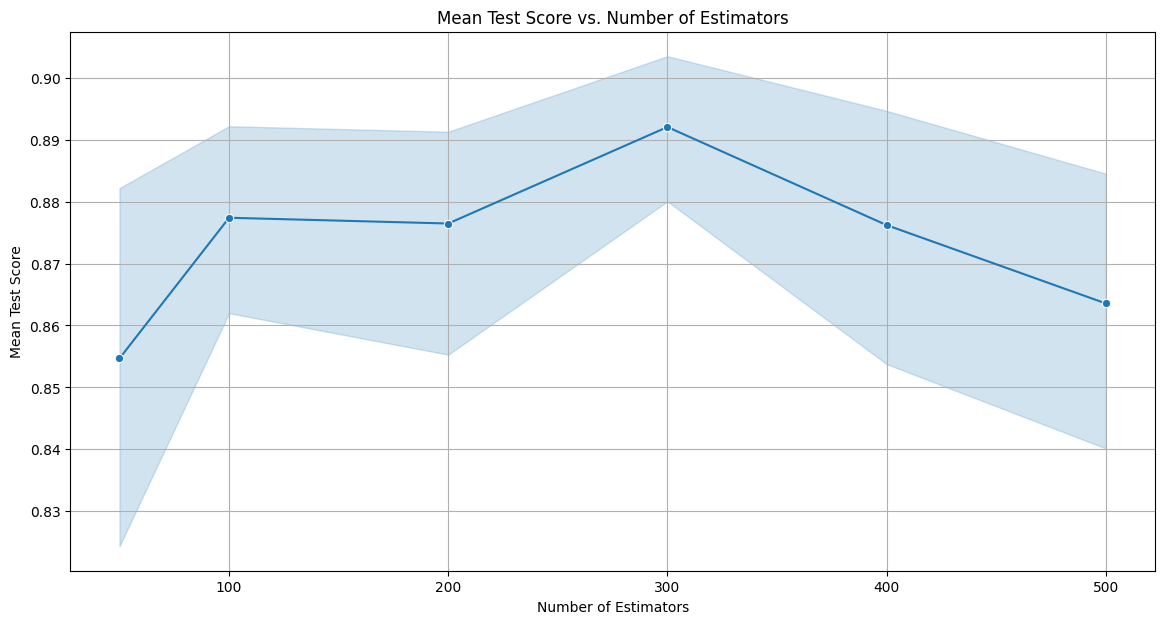

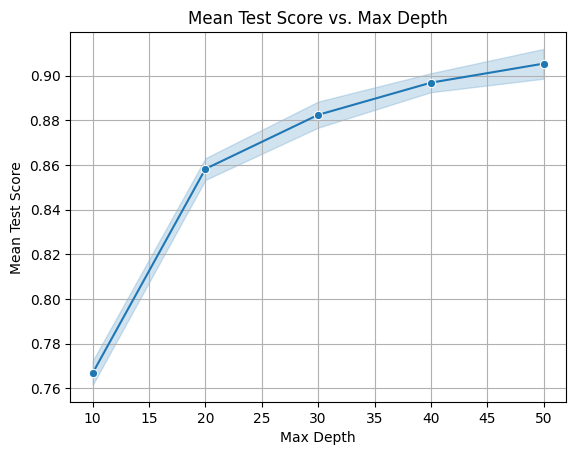

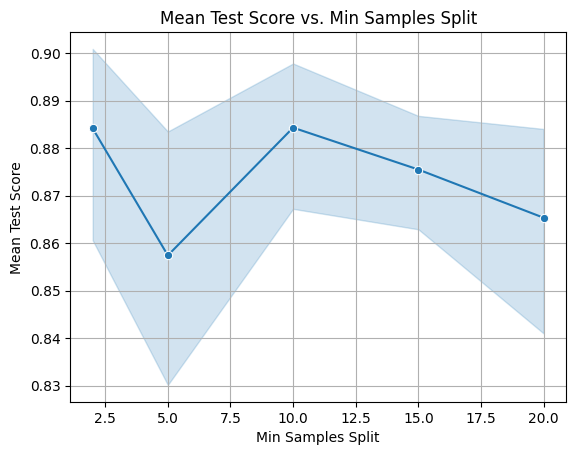

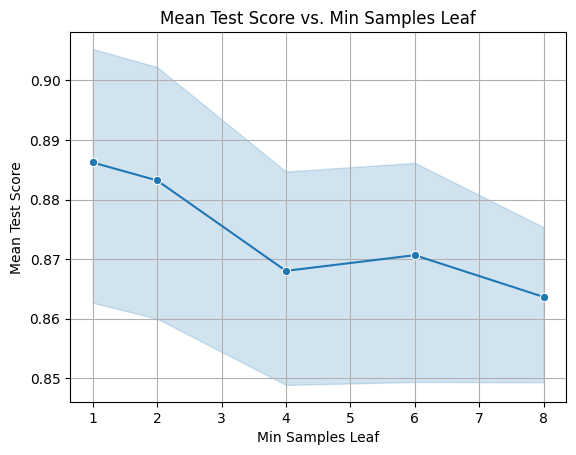

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot mean test score vs. n_estimators
sns.lineplot(x='param_n_estimators', y='mean_test_score', data=results, marker='o')
plt.title('Mean Test Score vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.show()

# Plot mean test score vs. max_depth
sns.lineplot(x='param_max_depth', y='mean_test_score', data=results, marker='o')
plt.title('Mean Test Score vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.show()

# Plot mean test score vs. min_samples_split
sns.lineplot(x='param_min_samples_split', y='mean_test_score', data=results, marker='o')
plt.title('Mean Test Score vs. Min Samples Split')
plt.xlabel('Min Samples Split')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.show()

# Plot mean test score vs. min_samples_leaf
sns.lineplot(x='param_min_samples_leaf', y='mean_test_score', data=results, marker='o')
plt.title('Mean Test Score vs. Min Samples Leaf')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.show()

In [39]:
for index, row in top_results.iterrows():
    params = row['params']
    json_acceptable_string = params.replace("'", "\"").replace('False', 'false').replace('None', 'null').replace('True', 'true')
    params = json.loads(json_acceptable_string)
    clf = RandomForestClassifier(random_state=seed, **params)
    clf.fit(X_train_smote, y_train_smote)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Params: {params} -> F1 Score: {f1:.4f}")

Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False} -> F1 Score: 0.6675
Params: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False} -> F1 Score: 0.6725
Params: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': False} -> F1 Score: 0.6678
Params: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': False} -> F1 Score: 0.6706
Params: {'n_estimators': 400, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': False} -> F1 Score: 0.6685
Params: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False} -> F1 Score: 0.6709
Params: {'n_estimators': 500, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True} -> F1 Score: 0.6607
Params: {'n_estimators': 50, 'min_samples_split': 10

#### Best classifier

In [18]:
# Best model
best_params = joblib.load('models/best_random_forest_params.joblib')
best_clf = RandomForestClassifier(random_state=seed, **best_params)
best_params  = best_clf.get_params()

# Print the best parameters
print("Best hyperparameters found by GridSearchCV:")
for param_name in sorted(best_params.keys()):
    print(f"{param_name}: {best_params[param_name]}")

Best hyperparameters found by GridSearchCV:
bootstrap: False
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 333
verbose: 0
warm_start: False


In [ ]:
# Cross-validation score
cv_scores = cross_val_score(best_clf, X, y, cv=5)
print(f"Cross-validation accuracy: {cv_scores.mean():.4f}")

y_pred = best_clf.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Predicted vs Actual Rating Categories')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_clf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance for Predicting Ratings')
plt.tight_layout()
plt.show()

# # Analyze misclassifications
# df['predicted_category'] = best_clf.predict(X)
# misclassified = df[df['rating_category'] != df['predicted_category']]

# # Optional: Print or analyze misclassified examples
# print(f"Number of misclassified reviews: {len(misclassified)}")
